4.Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

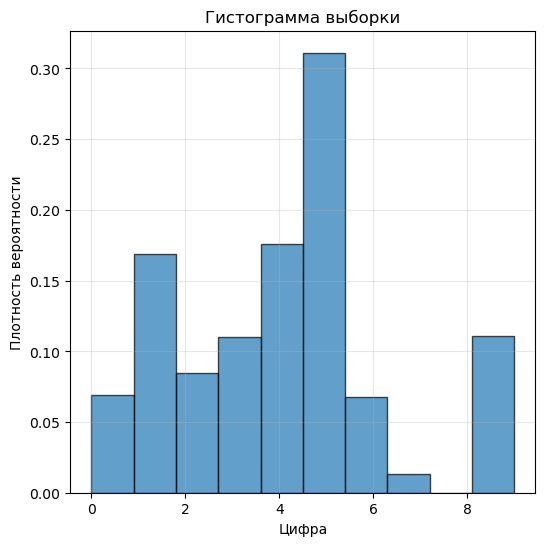

In [9]:
import numpy as np
import matplotlib.pyplot as plt

digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

weights = weights / weights.sum()

sorted_indices = np.argsort(weights)[::-1]
sorted_weights = weights[sorted_indices]
sorted_digits = digits[sorted_indices]
cumulative_probs = np.cumsum(sorted_weights)
uniform_sample = np.random.rand(1000)
sample = []

for u in uniform_sample:
    idx = np.searchsorted(cumulative_probs, u)
    sample.append(sorted_digits[idx])

sample = np.array(sample)

plt.figure(figsize=(6, 6))
plt.hist(sample, bins=len(digits), density=True, alpha=0.7, edgecolor='black')
plt.xlabel('Цифра')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма выборки')
plt.grid(True, alpha=0.3)

plt.show()

5 Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

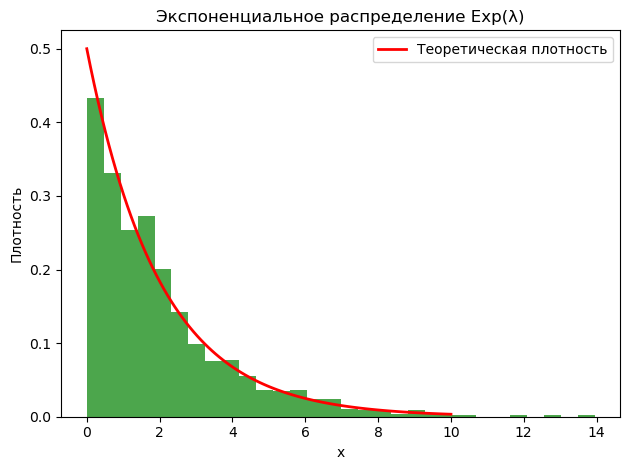

In [11]:
import numpy as np
import matplotlib.pyplot as plt

lmbda = 0.5


U = np.random.random(1000)
X = -np.log(1 - U) / lmbda

plt.hist(X, bins=30, density=True, alpha=0.7, color='green')
x_theor = np.linspace(0, 10, 100)
pdf_theor = lmbda * np.exp(-lmbda * x_theor)
plt.plot(x_theor, pdf_theor, 'r-', linewidth=2, label='Теоретическая плотность')
plt.title('Экспоненциальное распределение Exp(λ)')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()


6 Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

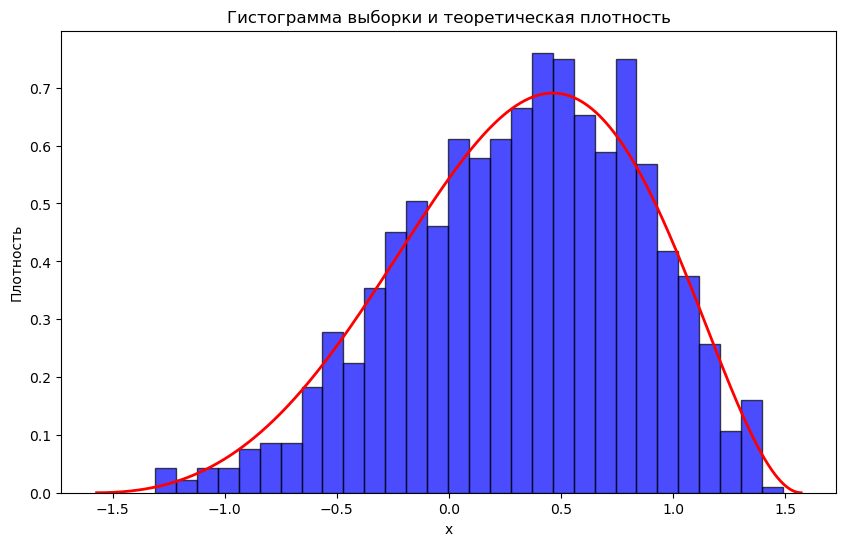

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def t(x):
    return np.exp(x) * (np.cos(x))**2


n_s = 1000
a, b = -np.pi/2, np.pi/2


x_test = np.linspace(a, b, 1000)
M = np.max(t(x_test)) * 1.1


s = []
while len(s) < n_s:
    x_c = np.random.uniform(a, b)
    y_c = np.random.uniform(0, M)
    if y_c <= t(x_c):
        s.append(x_c)

s = np.array(s)

x_range = np.linspace(a, b, 1000)
f_values = t(x_range)

area = np.trapezoid(f_values, x_range)
f_normalized = f_values / area

plt.figure(figsize=(10, 6))
plt.hist(s, bins=30, density=True, alpha=0.7, 
         color='blue', edgecolor='black',
         label='Выборочная гистограмма')
plt.plot(x_range, f_normalized, 'r-', linewidth=2, 
         label='Теоретическая плотность')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки и теоретическая плотность')
plt.show()


7 Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

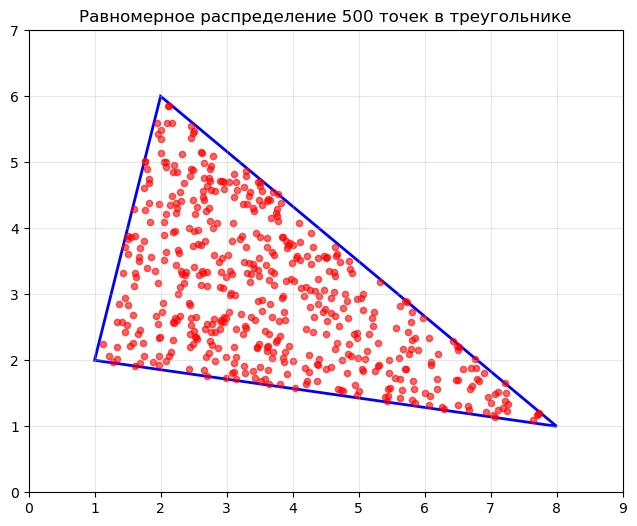

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

A, B, C = np.array([1, 2]), np.array([2, 6]), np.array([8, 1])

def sample_triangle_simple(A, B, C, n):
    u = np.random.random(n)
    v = np.random.random(n)
    
    mask = u + v > 1
    u[mask] = 1 - u[mask]
    v[mask] = 1 - v[mask]
    
    points = (A * u[:, np.newaxis] + 
              B * v[:, np.newaxis] + 
              C * (1 - u - v)[:, np.newaxis])
    return points

points = sample_triangle_simple(A, B, C, 500)

plt.figure(figsize=(8, 6))
triangle = Polygon([A, B, C], closed=True, fill=False, color='blue', linewidth=2)
plt.gca().add_patch(triangle)
plt.scatter(points[:, 0], points[:, 1], alpha=0.6, color='red', s=20)
plt.xlim(0, 9)
plt.ylim(0, 7)
plt.gca().set_aspect('equal')
plt.title('Равномерное распределение 500 точек в треугольнике')
plt.grid(True, alpha=0.3)
plt.show()

8 Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки.

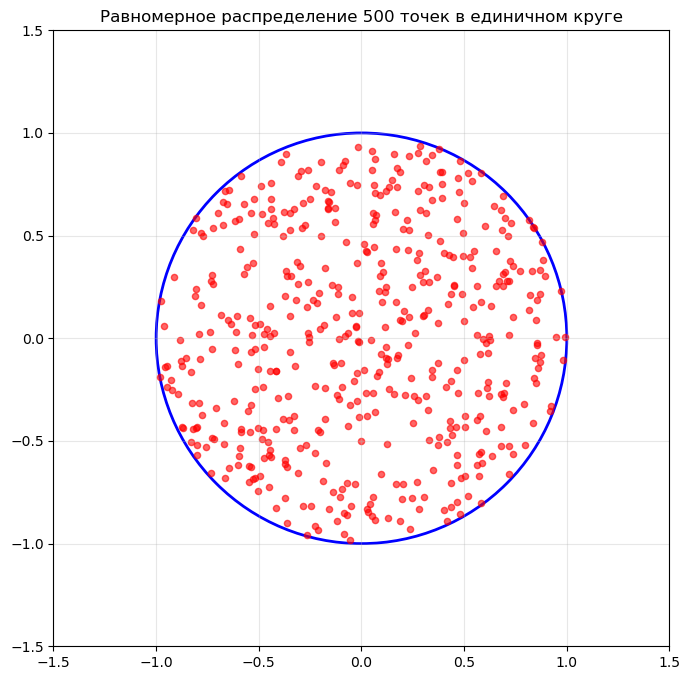

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sample_uniform_circle(n):
    r = np.sqrt(np.random.random(n)) 
    theta = np.random.uniform(0, 2*np.pi, n)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

n = 500
x, y = sample_uniform_circle(n)

plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='b', fill=False, linewidth=2)
plt.gca().add_patch(circle)
plt.scatter(x, y, alpha=0.6, color='red', s=20)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal')
plt.title('Равномерное распределение 500 точек в единичном круге')
plt.grid(True, alpha=0.3)
plt.show()

Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

Выборочное среднее: [3.98099088 7.13893297]
Точное среднее: [4. 7.]
Выборочная ковариационная матрица:
[[20.12201309 -3.31649322]
 [-3.31649322 35.93182587]]
Точная ковариационная матрица:
[[20. -4.]
 [-4. 40.]]


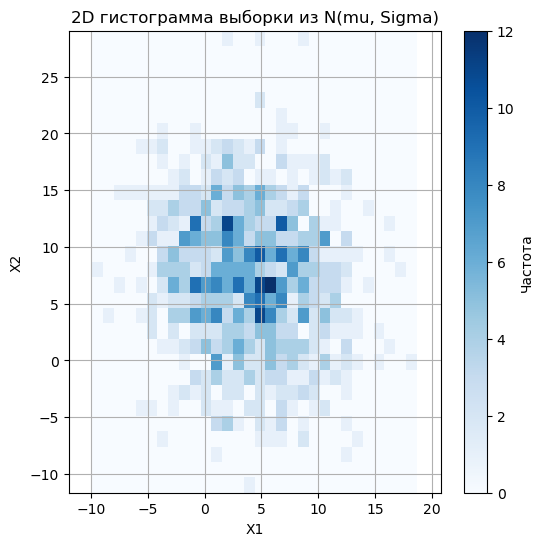

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

def marsaglia_normal(n):
    result = []
    while len(result) < 2 * n:
        v1, v2 = np.random.uniform(-1, 1, 2)
        s = v1**2 + v2**2
        if s < 1 and s > 0:
            factor = np.sqrt(-2 * np.log(s) / s)
            result.append(v1 * factor)
            result.append(v2 * factor)
    result = np.array(result).reshape(2, -1)
    return result[:2, :n] 
n = 1000
mu = np.array([4.0, 7.0])
Sigma = np.array([[20.0, -4.0],
                  [-4.0, 40.0]])
Z = marsaglia_normal(n)  
A = scipy.linalg.cholesky(Sigma, lower=True) 
X = mu[:, np.newaxis] + A @ Z
sample_mean = np.mean(X, axis=1)
sample_cov = np.cov(X)

print("Выборочное среднее:", sample_mean)
print("Точное среднее:", mu)
print("Выборочная ковариационная матрица:")
print(sample_cov)
print("Точная ковариационная матрица:")
print(Sigma)

plt.figure(figsize=(6, 6))
plt.hist2d(X[0, :], X[1, :], bins=30, cmap='Blues')
plt.colorbar(label='Частота')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D гистограмма выборки из N(mu, Sigma)')
plt.axis('equal')
plt.grid(True)
plt.show()